2022-05-31 <br/>
Company reputation poll <br/>
https://github.com/rfordatascience/tidytuesday/blob/master/data/2022/2022-05-31

Multi-facet comparison Bar plot - Completed 

https://community.plotly.com/t/need-help-in-making-diverging-stacked-bar-charts/34023/2 

In [1]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.renderers.default='jupyterlab'
import os

In [34]:
df= pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-05-31/reputation.csv')

In [35]:
df.head()

,company,industry,name,score,rank
0,Trader Joe's,Retail,TRUST,82.7,3
1,Trader Joe's,Retail,ETHICS,82.5,2
2,Trader Joe's,Retail,GROWTH,84.1,2
3,Trader Joe's,Retail,P&S,83.5,9
4,Trader Joe's,Retail,CITIZENSHIP,80.0,3


In [36]:
df.company.nunique()

100

In [40]:
selected_companies = ["Trader Joe's","Toyota Motor Corporation", "Amazon.com", "Comcast","Fox Corporation","The Trump Organization"]
df_selected =df[df.company.isin(selected_companies)].reset_index(drop=True)

In [41]:
df_selected.head()

,company,industry,name,score,rank
0,Trader Joe's,Retail,TRUST,82.7,3
1,Trader Joe's,Retail,ETHICS,82.5,2
2,Trader Joe's,Retail,GROWTH,84.1,2
3,Trader Joe's,Retail,P&S,83.5,9
4,Trader Joe's,Retail,CITIZENSHIP,80.0,3


In [42]:
df_reduced= df_selected.pivot(index = "company",columns="name",values= "score").reset_index()

In [43]:
df_reduced

name,company,CITIZENSHIP,CULTURE,ETHICS,GROWTH,P&S,TRUST,VISION
0,Amazon.com,77.0,79.1,78.9,82.9,81.8,79.9,84.1
1,Comcast,65.2,69.6,67.8,72.9,72.0,66.6,72.6
2,Fox Corporation,60.2,59.9,60.2,65.9,63.4,59.2,66.3
3,The Trump Organization,70.8,71.9,71.4,77.7,78.3,70.5,76.9
4,Toyota Motor Corporation,76.6,80.2,79.7,83.5,83.6,78.7,82.4
5,Trader Joe's,80.0,83.1,82.5,84.1,83.5,82.7,81.9


In [52]:



fig = go.Figure()
for col in df_reduced.columns[1:5]:
    fig.add_trace(go.Bar(x=-df_reduced[col].values,
                         y=df_reduced['company'],
                         orientation='h',
                         name=col,
                         customdata=df_reduced[col],
                         hovertemplate = "%{y}: %{customdata}"))
for col in df_reduced.columns[5:]:
    fig.add_trace(go.Bar(x= df_reduced[col],
                         y =df_reduced['company'],
                         orientation='h',
                         name= col,
                         hovertemplate="%{y}: %{x}"))    

fig.update_layout(barmode='relative', 
                #   height=400, 
                #   width=700, 
                  yaxis_autorange='reversed',
                  bargap=0.01,
                  legend_orientation ='h',
                  legend_x=-0.05, legend_y=1.1,
                  title = "Comparing Company Reputation Across the Board"

                 )
fig.show()

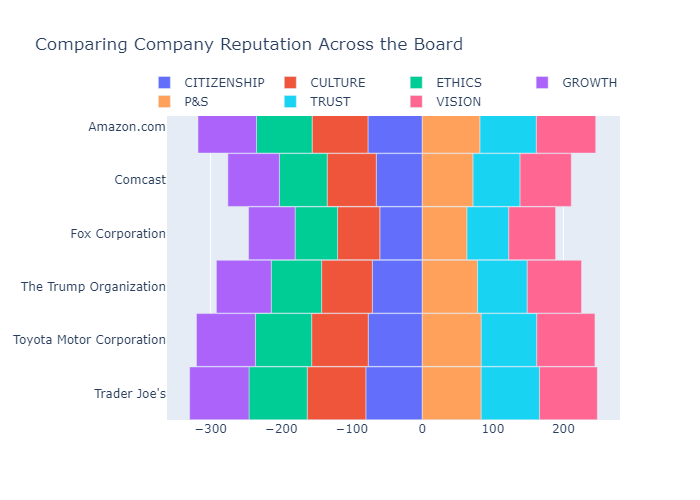

In [51]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)